# Repaso Pandas Completito

En este ejercicio utilizaremos un dataset de cervezas, donde se recogen los datos de un montón de ellas, exponiendo sus características, tales como nivel de alcohol, amargura, tamaño...


In [4]:
import pandas as pd
import numpy as np
from scipy import stats

## Ejercicio 1
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros 10 registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [5]:
# 1.
df = pd.read_csv('datasets_beers.csv')

# 2.
df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [6]:
# 3.
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [7]:
# 4.
df.shape

(2410, 8)

## Ejercicio 3

Elimina la columna "Unnamed: 0"

In [8]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [9]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 2410
Columnas: 7


## Ejercicio 5
¿De qué tipo son los datos?

In [10]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, quantiles...

In [11]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [12]:
df['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

In [13]:
df.groupby('style')['name'].count().sort_values(ascending = False)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Flanders Red Ale                    1
Braggot                             1
Smoked Beer                         1
Flanders Oud Bruin                  1
Wheat Ale                           1
Name: name, Length: 99, dtype: int64

In [14]:
df['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Braggot                             1
Grisette                            1
Flanders Oud Bruin                  1
Smoked Beer                         1
Name: style, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [15]:
df.iloc[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [16]:
df[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [17]:
df.loc[10:21, 'name':'ounces']

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [18]:
df.iloc[10:21][['abv', 'ibu', 'ounces']]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [19]:
df.iloc[10:21][['abv', 'ibu', 'ounces']].values

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [20]:
df['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [21]:
print(round(df['ibu'].mean(),2))
print(df['ibu'].max())
print(df['ibu'].min())

42.71
138.0
4.0


In [22]:
df[df['ibu'] == df['ibu'].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [23]:
df[df['ibu'] == df['ibu'].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [24]:
print(df['ibu'].var())
print(df['ibu'].std())

673.6135373259932
25.954065911259324


In [25]:
print(df['ibu'].mean())

42.71316725978647


## Ejercicio 12

Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

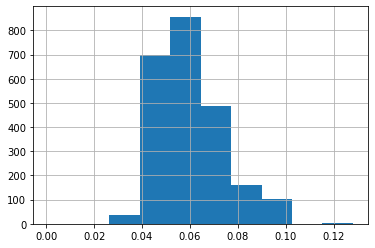

In [26]:
df['abv'].hist()
df.columns

In [27]:
df['abv'].skew()

0.9584771340361395

## Ejercicio 13
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [28]:
df.groupby('style')['abv'].mean().sort_values(ascending = False).head()

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
Name: abv, dtype: float64

In [29]:
df.groupby('style')['ibu'].mean().sort_values(ascending = False).head()

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
Name: ibu, dtype: float64

## Ejercicio 14

Carga el datasets de cervecerías `datasets_breweries.csv`

In [30]:
df2 = pd.read_csv("datasets_breweries.csv")
df2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 15

1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [31]:
df2 = df2.rename(columns={"Unnamed: 0": "brewery_id",
                          "name": "brewery_name"})

In [32]:
df2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 16

Junta los dos datasets que tienes

In [33]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [34]:
df3 = df.merge(df2, on='brewery_id')
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 17

1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [35]:
print(len(df3['state'].unique()))
print(len(df3['city'].unique()))
print(len(df3['brewery_id'].unique()))
print(len(df3['brewery_name'].unique()))

51
384
558
551


## Ejercicio 18

Calcula, agrupando por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [36]:
df3.groupby(['state', 'city']).aggregate(['mean', 'median', 'max'])['abv']

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 19

¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [37]:
df3['state'].unique()

array([' OR', ' IN', ' CA', ' FL', ' MO', ' WA', ' CO', ' LA', ' KY',
       ' AK', ' WI', ' OH', ' OK', ' NC', ' MI', ' TX', ' CT', ' AL',
       ' MA', ' AZ', ' MN', ' ME', ' VA', ' IL', ' TN', ' MT', ' WY',
       ' NE', ' NY', ' UT', ' NJ', ' PA', ' NV', ' SC', ' GA', ' RI',
       ' IA', ' AR', ' ID', ' SD', ' DC', ' KS', ' ND', ' VT', ' MD',
       ' WV', ' HI', ' DE', ' NM', ' MS', ' NH'], dtype=object)

In [38]:
bitter = df3[df3['state'] == ' IN']
bitter.sort_values(['ibu'], ascending = False)[['name', 'ibu', 'state']]

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN
...,...,...,...
2056,The Deuce,NaN,IN
2061,Chaka,NaN,IN
2190,Klingon Warnog Roggen Dunkel,NaN,IN
2277,Dragonfly IPA,NaN,IN


## Ejercicio 20

Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [39]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 21

Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [40]:
def filter_func(x):
    return x['abv'].min() == 0.07

In [41]:
df3.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces',
       'brewery_name', 'city', 'state'],
      dtype='object')

In [42]:
df3.groupby('brewery_name').filter(filter_func)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
137,0.070,45.0,1322,Green Bullet Organic India Pale Ale,American IPA,429,16.0,Asher Brewing Company,Boulder,CO
191,0.070,46.0,2618,Thai.p.a,American IPA,20,16.0,Bare Hands Brewery,Granger,IN
752,0.070,NaN,1107,Nut Sack Imperial Brown Ale,American Brown Ale,465,12.0,Engine 15 Brewing,Jacksonville Beach,FL
884,0.070,73.0,2254,Salamander Slam,American IPA,180,16.0,Frog Level Brewing Company,Waynesville,NC
905,0.070,11.0,2587,Vanilla Porter,American Porter,39,16.0,Gonzo's BiggDogg Brewing,Kalamazoo,MI
1767,0.076,78.0,1577,12th Round,American Strong Ale,376,16.0,RoughTail Brewing Company,Midwest City,OK
1768,0.070,80.0,1576,RoughTail IPA,American IPA,376,16.0,RoughTail Brewing Company,Midwest City,OK
1769,0.080,NaN,1575,Polar Night Stout,American Stout,376,16.0,RoughTail Brewing Company,Midwest City,OK
1831,0.070,105.0,918,Frankenlou's IPA,American IPA,494,16.0,Seven Brides Brewery,Silverton,OR
1832,0.070,55.0,917,Becky's Black Cat Porter,American Porter,494,16.0,Seven Brides Brewery,Silverton,OR


## Ejercicio 22

Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [93]:
mean_tot_ibu = df3['ibu'].mean()
print(mean_tot_ibu)

def filter_func(x):
    return x['ibu'].mean() > mean_tot_ibu

df3.groupby('state').filter(filter_func)

42.71316725978647


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
